# **Лабораторная работа №5**
## **Кластеризация**
## **Вариант 4:  Сегментация клиентов**
Набор данных содержит сведения о клиентах, и нужно применить сегментацию
клиентов к этим историческим данным. Сегментация клиентов – это практика разби
ения клиентской базы на группы людей со схожими характеристиками. Это важная
стратегия, поскольку бизнес может нацеливаться на эти конкретные группы клиентов
и эффективно распределять маркетинговые ресурсы. Например, одна группа может
содержать клиентов с высокой прибылью и низким риском, то есть с большей вероят
ностью приобретающих продукты или подписывающихся на услуги. Задача бизнеса – удержать этих клиентов. Другая группа может включать клиентов из некоммерче
ских организаций.

Набор данных включает следующие атрибуты:
*   Customer Id – идентификатор клиента;
*   Age – возраст;
*   Edu – образование;
*   Years Employed – сроки работы;
*   Income – доход;
*   Card Debt – долг по карте;
*   Other Debt– другой долг;
*   Defaulted – дефолт;
*   Address – адрес;
*   DebtIncomeRatio – соотношение долга и дохода.



## Импортируем библиотеки и загружаем данные

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Получим информацию о датасете

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


## Проверяем данные на наличие пропущенных значений и выбросов

In [4]:
# проверяем на пропущенные значения
print(df.isnull().sum())

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64


In [5]:
df_copy = df.copy()
# заполняем пропуски в столбце Defaulted средним арифметическим через метод mean()
df_copy['Defaulted'] = df_copy['Defaulted'].fillna(df_copy['Defaulted'].mean())
# убедимся, что пропусков не осталось
df_copy['Defaulted'].isna().sum()

np.int64(0)

## Исключаем невлияющие категориальные признаки

In [6]:
y = df_copy['Address']
df_copy.drop('Address', axis = 1, inplace = True)
df_copy.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


## Применяем операцию нормализации для численной устойчивости

In [7]:
# импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler  = StandardScaler()
scaler

StandardScaler()

## Приведем данные к единому масштабу

In [8]:
X = scaler.fit_transform(df_copy)
print(X[:4,:])

[[-1.7300143   0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116
  -0.59048916 -0.65560267 -0.57652509]
 [-1.72593888  1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366
   1.51296181 -0.65560267  0.39138677]
 [-1.72186347 -0.25251804  0.31212243  0.2117124   0.26803233  2.13414111
   0.80170393  1.85216712  1.59755385]
 [-1.71778805 -0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323
  -0.75446707 -0.65560267 -0.57652509]]


## Определяем оптимальное количество кластеров с помощью метода локтя

In [9]:
from sklearn.cluster import KMeans

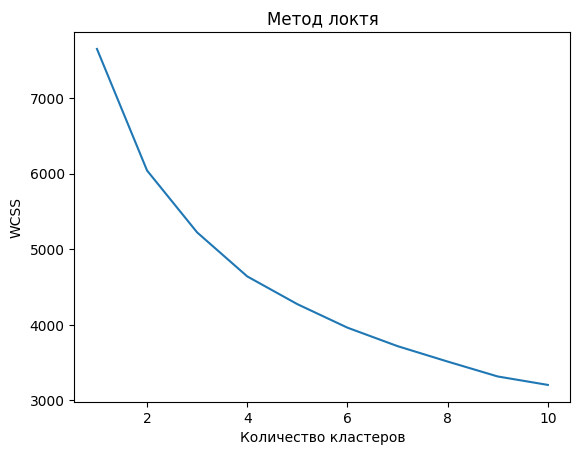

In [10]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

## Обучаем модель кластеризации

In [11]:
# создадим экземпляр модели
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
# обучаем модель на стандартизированных данных
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

## Предсказываем кластеры и визуализируем результаты

In [12]:
# предсказываем кластеры для каждого
clusters = kmeans.predict(X)
# добавляем метки кластеров в исходные данные
df_copy['cluster'] = clusters
df_copy.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,3
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


## Визуализация результатов

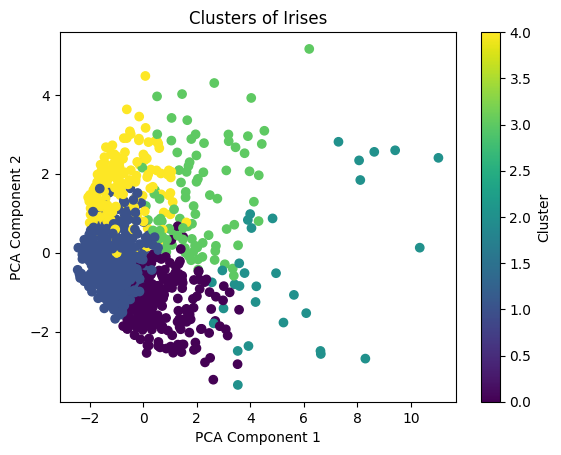

In [13]:
from sklearn.decomposition import PCA

# Уменьшаем размерность до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Irises')
plt.colorbar(label='Cluster')
plt.show()

In [14]:
# Группируем по кластерам
cluster_groups = df_copy.groupby('cluster')
# Анализ средних значений в каждом кластере
cluster_groups.mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,387.437186,42.296482,1.527638,15.638191,65.829146,1.525332,3.015101,0.079218,7.399497
1,445.412987,31.402597,1.651948,5.374026,30.007792,0.690465,1.581319,0.052965,7.830390
2,381.580645,45.419355,2.580645,19.870968,183.354839,6.859871,12.855968,0.276406,12.109677
3,429.413043,37.173913,1.847826,10.913043,56.652174,4.197033,7.319522,0.382919,21.329348
4,431.860140,31.048951,1.846154,3.356643,28.846154,1.203804,2.351140,0.994835,12.734266


## Визуализация по нескольким парам разных признаков с указанием центроид

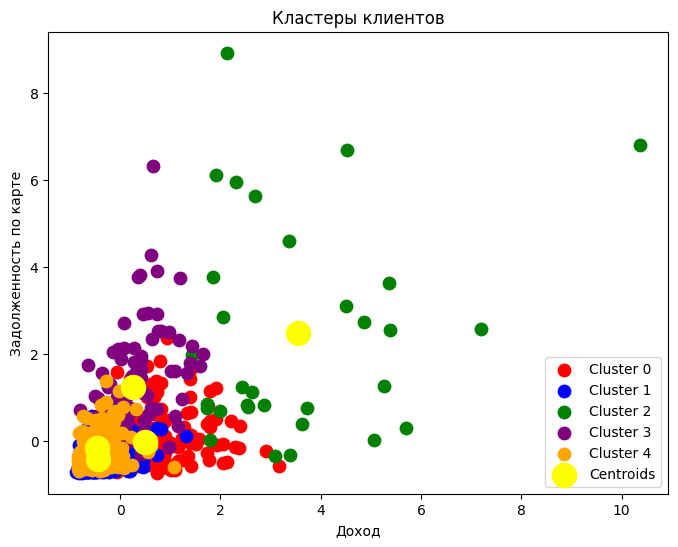

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(X[clusters == 0,4], X[clusters == 0,5], s = 80, c = 'red', label = 'Cluster 0')
plt.scatter(X[clusters == 1,4], X[clusters == 1,5], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(X[clusters == 2,4], X[clusters == 2,5], s = 80, c = 'green', label = 'Cluster 2')
plt.scatter(X[clusters == 3,4], X[clusters == 3,5], s = 80, c = 'purple', label = 'Cluster 3')
plt.scatter(X[clusters == 4,4], X[clusters == 4,5], s = 80, c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,4],kmeans.cluster_centers_[:,5], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Кластеры клиентов')
plt.xlabel('Доход')
plt.ylabel('Задолженность по карте')
plt.legend()
plt.show()

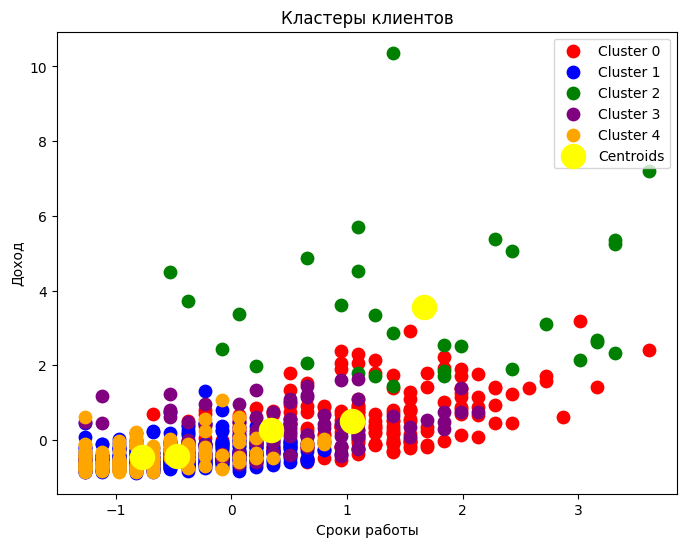

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(X[clusters == 0,3], X[clusters == 0,4], s = 80, c = 'red', label = 'Cluster 0')
plt.scatter(X[clusters == 1,3], X[clusters == 1,4], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(X[clusters == 2,3], X[clusters == 2,4], s = 80, c = 'green', label = 'Cluster 2')
plt.scatter(X[clusters == 3,3], X[clusters == 3,4], s = 80, c = 'purple', label = 'Cluster 3')
plt.scatter(X[clusters == 4,3], X[clusters == 4,4], s = 80, c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,3],kmeans.cluster_centers_[:,4], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Кластеры клиентов')
plt.xlabel('Сроки работы')
plt.ylabel('Доход')
plt.legend()
plt.show()

In [ ]:
# Добавим адреса клиентов в исходные данные
df_copy['Address'] = y
df_copy.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster,Address
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1,NBA001
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0,NBA021
2,3,33,2,10,57,6.111,5.802,1.0,20.9,3,NBA013
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1,NBA009
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2,NBA008


In [ ]:
# Вывод адресов в каждом кластере
for cluster_num in range(5):
  print(f"\nCluster {cluster_num} addresses:")
  print(df_copy[df_copy['cluster'] == cluster_num]['Address'].values)


Cluster 0 addresses:
['NBA021' 'NBA016' 'NBA011' 'NBA019' 'NBA000' 'NBA013' 'NBA004' 'NBA022'
 'NBA008' 'NBA007' 'NBA000' 'NBA006' 'NBA009' 'NBA010' 'NBA019' 'NBA026'
 'NBA004' 'NBA005' 'NBA020' 'NBA010' 'NBA009' 'NBA004' 'NBA009' 'NBA009'
 'NBA011' 'NBA018' 'NBA012' 'NBA001' 'NBA004' 'NBA024' 'NBA015' 'NBA000'
 'NBA017' 'NBA012' 'NBA012' 'NBA006' 'NBA015' 'NBA010' 'NBA014' 'NBA003'
 'NBA009' 'NBA009' 'NBA010' 'NBA003' 'NBA023' 'NBA014' 'NBA025' 'NBA005'
 'NBA013' 'NBA016' 'NBA008' 'NBA016' 'NBA014' 'NBA008' 'NBA025' 'NBA001'
 'NBA004' 'NBA008' 'NBA023' 'NBA008' 'NBA005' 'NBA011' 'NBA018' 'NBA008'
 'NBA012' 'NBA009' 'NBA010' 'NBA020' 'NBA009' 'NBA008' 'NBA025' 'NBA012'
 'NBA021' 'NBA011' 'NBA018' 'NBA014' 'NBA015' 'NBA001' 'NBA017' 'NBA018'
 'NBA002' 'NBA005' 'NBA018' 'NBA016' 'NBA014' 'NBA008' 'NBA003' 'NBA005'
 'NBA003' 'NBA019' 'NBA025' 'NBA031' 'NBA017' 'NBA002' 'NBA004' 'NBA020'
 'NBA017' 'NBA017' 'NBA000' 'NBA023' 'NBA006' 'NBA019' 'NBA002' 'NBA004'
 'NBA011' 'NBA016' 'NBA026' '